### 설치

- conda install pytorch-cpu torchvision-cpu -c pytorch

### PyTorch(파이토치)

- 딥러닝 프레임워크(엔진)
- Lua(루아) 언어로 만든 오픈소스 라이브러리
- 뉴욕대 + 페이스북 공동 개발
- 루아 버전은 인기가 별로 없었다(접근성이 낮음), 파이썬 버전으로 나오고 나서(1.0 발표 후) 급격히 증가
- 딥러닝 프레임워크의 특성
    - 복잡한, 큰 계산 그래프를 손쉽게 개발
    - 계산 그래프를 이용하여 미적분 같은 연산도 쉽게 처리
    - GPU 연산을 효율적으로 수행
- 파이토치 특징
    - Numpy 기반 Tensor 연산을 GPU로 수행 가능
    - 자동미분시스템을 이용하여 모델을 쉽게 구성한다
    - 파이썬과 같이 활용
        - Scipy : 과학 컴퓨팅과 기술 컴퓨팅에 사용
        - Numpy : 행렬, 대규모의 다차원 배열을 쉽게 처리(수학/과학용 라이브러리)
        - Cython : 파이썬의 빠른 생산성, 외부 C의 강력한 처리속도를 연동하여 수행
    - Dynamic Graph Define : 변수 선언 동시에 그래프를 그리고 연산을 가능하게 만든다

### Tensorflow vs PyTorch
**장르의 경계는 없다**
- Tensorflow : 산업용
    - Define-and-Run 방식
        - 계산 그래프를 그림
        - 세션 그래프에 들어갈 수치를 대입
- PyTorch : 학계용
    - Define-by-Run 방식
        - 계산 그래프를 그리는 동시에
        - 그래프에 들어간 숫자를 보관하고 있고
        - 연산 바로 수행 가능
    - 2018.10 이후 산업용으로 확산되고 있다 (제품화 솔루션을 지원)

In [1]:
import torch

In [5]:
# 리스트로부터 텐서 생성
tmp_list = [ [1, 2, 3], [4, 5, 6] ]
x_list_tensor = torch.Tensor( tmp_list )
# 텐서를 생성하면 정수값도 float로 변환된다
x_list_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
# 원복 : Tensor에서 리스트 추출
x_list_tensor.tolist()

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [4]:
import numpy as np

In [7]:
# 배열 (numpy ndarray) :
x_numpy_array = np.array( tmp_list )
x_numpy_array

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
x = torch.Tensor( x_numpy_array )
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [9]:
# 원복
x.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

- GPU 사용

In [10]:
x.device

device(type='cpu')

In [11]:
# NVIDIA의 cuda 지원 여부
device = 'cuda'
try : 
    x.to(device)
    print('%s 지원' % device, x)
except Exception as e :
    print('%s 미지원' % device, e)

cuda 미지원 Torch not compiled with CUDA enabled


In [12]:
device = 'cpu'
try : 
    x.to(device)
    print('%s 지원' % device, x)
except Exception as e :
    print('%s 미지원' % device, e)

cpu 지원 tensor([[1., 2., 3.],
        [4., 5., 6.]])


- 랜덤 텐서 생성

In [28]:
# 2x3 행렬 생성, 난수값 0 ~ 1 사이
torch.rand( 2, 3 )

tensor([[0.8650, 0.4916, 0.9829],
        [0.5351, 0.1912, 0.8132]])

In [29]:
# 0<=x<5 랜덤값
# 2x3 행렬 생성
torch.randint(low = 0, high = 5, size = (2, 3))

tensor([[1, 3, 4],
        [3, 2, 2]])

In [30]:
# 영행렬
torch.zeros( 2, 2 )

tensor([[0., 0.],
        [0., 0.]])

In [31]:
# 구성원이 1인 행렬
torch.ones( 2, 2 )

tensor([[1., 1.],
        [1., 1.]])

In [32]:
# 특정 텐서의 크기와 동일한 영행렬을 만들어라
torch.zeros_like( x )

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [33]:
torch.ones_like( x )

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [34]:
# GPU를 이용하여 동일 크기의 영행렬 생성
try : 
    torch.ones_like( x.cuda() )
except Exception as e : pass

- 텐서의 타입

In [35]:
# 실수형 텐서
a = torch.FloatTensor( x_numpy_array )

In [36]:
# 타입 확인은 텐서.type()
a.type(), type(a), a

('torch.FloatTensor', torch.Tensor, tensor([[1., 2., 3.],
         [4., 5., 6.]]))

In [38]:
# 정수형 텐서
b = torch.IntTensor( x_numpy_array )

In [39]:
b.type(), type(b), b

('torch.IntTensor', torch.Tensor, tensor([[1, 2, 3],
         [4, 5, 6]], dtype=torch.int32))

In [ ]:
# numpy ndarray → 행렬 구성의 모든 타입은 동일하다

In [40]:
# 8-bit unsigned ByteTensor, 이진 데이터
c = torch.ByteTensor( [ True, False, True, False ] )
c.type(), c

('torch.ByteTensor', tensor([1, 0, 1, 0], dtype=torch.uint8))

- 텐서 오퍼레이션
    - 슬라이싱
    - 뷰
    - 트랜스포즈
    - 스퀴즈, 언스퀴즈
    - 캣, 스택
    - 기본연산 (더하기, 빼기, 곱하기, 나누기)
    - 합, 평균
    - 최대, 최소
    - 논리 연산

- slicing, indexing

In [41]:
# 작업의 일관성을 주기 위해 → 씨드
torch.manual_seed( 555 )

In [43]:
# 크기가 2, 3, 4, 
# 3차원 텐서(큐브)를 생성하시오.
# 값은 0 <= n <= 9, 변수는 x
x = torch.randint(low = 0, high = 10, size = (2, 3, 4))
x

tensor([[[1, 7, 0, 0],
         [7, 8, 7, 5],
         [9, 1, 3, 5]],

        [[8, 7, 6, 5],
         [5, 2, 7, 8],
         [5, 9, 2, 8]]])

In [44]:
x[0]

tensor([[1, 7, 0, 0],
        [7, 8, 7, 5],
        [9, 1, 3, 5]])

In [46]:
x[0][2]

tensor([9, 1, 3, 5])

In [47]:
# 차원 축소하는 방식은 
# 1) 차원별로 []를 사용하는 방법
x[0][2][3]

tensor(5)

In [48]:
# 2) 차원별로 인덱스를 나열하는 방법 
x[0, 2, 3]

tensor(5)

In [50]:
# 텐서 시각화
import matplotlib.pyplot as plt

In [52]:
# 크기가 2, 3, 4
# 3차원
len(x), len(x[0])

(2, 3)

In [58]:
# 텐서 시각화 함수
def tensor_draw( tmp ) :
    fig, axes = plt.subplots( len(tmp), 1 )
    for i in range( len(tmp) ) :
        # 차트의 최대값 1, 최소값 0
        # 배열의 1차원의 첫번째, 두번째, ...를 각각 그린다
        # 값이 0 또는 1이므로 연산의 결과를 필터를 통과시켜 
        # 영향 받는 부분을 0으로 표시하여 
        # 시각화 시 검은색으로 표현된 부분이 연산의 영향받은 부분으로 판단
        axes[i].matshow( tmp.numpy()[i], vmin = 0, vmax = 1, cmap = 'gray'  )
    plt.show()

In [54]:
# x와 동일한 크기의 텐서인 1로 채워진 큐브를 구성하시오
tmp = torch.ones_like(x)
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [55]:
# x[0, 2, 3] 값은?
# 시각적으로 위치가 어디인가?
tmp[0, 2, 3] = 0

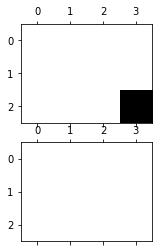

In [59]:
tensor_draw(tmp)

In [60]:
tmp1 = torch.zeros_like(x)
tmp1

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

In [63]:
x * tmp1

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

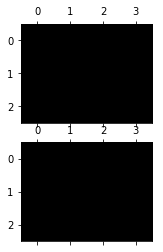

In [64]:
tensor_draw( x * tmp1 )

In [65]:
x[0, :2, 3]

tensor([0, 5])

In [ ]:
tmp1 = torch.zeros_like(x)

In [66]:
tmp1[0, :2, 3] = 1
tmp1

tensor([[[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

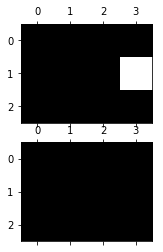

In [67]:
tensor_draw( x * tmp1 )

- view
    - shape의 변경
    - numpy.reshape()과 동일, 실제도 그 함수 존재

In [70]:
x

tensor([[[1, 7, 0, 0],
         [7, 8, 7, 5],
         [9, 1, 3, 5]],

        [[8, 7, 6, 5],
         [5, 2, 7, 8],
         [5, 9, 2, 8]]])

In [68]:
x.shape

torch.Size([2, 3, 4])

In [ ]:
# x = 2*3*4 => 24

In [69]:
# 2*2*6 = 24
# 순차적으로 6개를 맞추고,
# 부족하면 다음 차원에서 당겨
# 다음 번은 사용한 다음부터 차례대로 개수를 맞춰서 차원을 구성
x.view( 2, 2, 6 )

tensor([[[1, 7, 0, 0, 7, 8],
         [7, 5, 9, 1, 3, 5]],

        [[8, 7, 6, 5, 5, 2],
         [7, 8, 5, 9, 2, 8]]])

In [71]:
x.reshape(2, 2, 6)

tensor([[[1, 7, 0, 0, 7, 8],
         [7, 5, 9, 1, 3, 5]],

        [[8, 7, 6, 5, 5, 2],
         [7, 8, 5, 9, 2, 8]]])

In [72]:
# -1 : 몇 개가 될 지 모른다 → 뒤를 먼저 맞추고 나오는대로 앞을 세팅
x.view(-1, 1, 12)

tensor([[[1, 7, 0, 0, 7, 8, 7, 5, 9, 1, 3, 5]],

        [[8, 7, 6, 5, 5, 2, 7, 8, 5, 9, 2, 8]]])

- transpose : 차원 맞교환

In [73]:
x, x.shape

(tensor([[[1, 7, 0, 0],
          [7, 8, 7, 5],
          [9, 1, 3, 5]],
 
         [[8, 7, 6, 5],
          [5, 2, 7, 8],
          [5, 9, 2, 8]]]), torch.Size([2, 3, 4]))

In [74]:
# 0차원과 1차원을 맞교환
# 2*3*4 → 3*2*4
x_trans = x.transpose(0, 1)
x_trans.size()

torch.Size([3, 2, 4])

In [75]:
x_trans

tensor([[[1, 7, 0, 0],
         [8, 7, 6, 5]],

        [[7, 8, 7, 5],
         [5, 2, 7, 8]],

        [[9, 1, 3, 5],
         [5, 9, 2, 8]]])

- squeeze, unsqueeze

In [77]:
x = torch.rand( ( 2, 1, 3, 5, 1 ) )
x

tensor([[[[[0.9927],
           [0.4962],
           [0.0208],
           [0.0421],
           [0.2089]],

          [[0.1371],
           [0.7273],
           [0.9909],
           [0.7605],
           [0.7611]],

          [[0.3737],
           [0.3049],
           [0.3840],
           [0.9543],
           [0.1674]]]],



        [[[[0.8694],
           [0.3368],
           [0.9035],
           [0.9918],
           [0.5059]],

          [[0.7320],
           [0.1798],
           [0.3124],
           [0.4157],
           [0.2395]],

          [[0.6522],
           [0.1130],
           [0.7938],
           [0.3567],
           [0.6564]]]]])

In [78]:
# 모든 차원에서 1차값을 가진 차원을 제거 → 2, 3, 5
x.squeeze()

tensor([[[0.9927, 0.4962, 0.0208, 0.0421, 0.2089],
         [0.1371, 0.7273, 0.9909, 0.7605, 0.7611],
         [0.3737, 0.3049, 0.3840, 0.9543, 0.1674]],

        [[0.8694, 0.3368, 0.9035, 0.9918, 0.5059],
         [0.7320, 0.1798, 0.3124, 0.4157, 0.2395],
         [0.6522, 0.1130, 0.7938, 0.3567, 0.6564]]])

In [79]:
x.squeeze().size()

torch.Size([2, 3, 5])

In [80]:
x.squeeze(1)

tensor([[[[0.9927],
          [0.4962],
          [0.0208],
          [0.0421],
          [0.2089]],

         [[0.1371],
          [0.7273],
          [0.9909],
          [0.7605],
          [0.7611]],

         [[0.3737],
          [0.3049],
          [0.3840],
          [0.9543],
          [0.1674]]],


        [[[0.8694],
          [0.3368],
          [0.9035],
          [0.9918],
          [0.5059]],

         [[0.7320],
          [0.1798],
          [0.3124],
          [0.4157],
          [0.2395]],

         [[0.6522],
          [0.1130],
          [0.7938],
          [0.3567],
          [0.6564]]]])

In [81]:
# 행렬의 두번째 차원(인덱스로는 1)을 스퀴즈 한다
# 스퀴즈는 차원이 1일 경우에만
x.squeeze(1).size()

torch.Size([2, 3, 5, 1])

In [83]:
# 인덱스 3번 4차원 자리에 차원의 크기 1인 행렬을 삽입
x.unsqueeze(3).size()

torch.Size([2, 1, 3, 1, 5, 1])

- cat, stack

In [84]:
A = torch.rand( (2, 3) )
B = torch.rand( (2, 3) )
A, B

(tensor([[8.0876e-01, 1.4668e-01, 2.6317e-01],
         [3.6335e-01, 7.1981e-01, 2.4021e-04]]),
 tensor([[0.2001, 0.7263, 0.3462],
         [0.3878, 0.2292, 0.2740]]))

In [85]:
AB_cat = torch.cat( [A, B], dim = 0 )
AB_cat

tensor([[8.0876e-01, 1.4668e-01, 2.6317e-01],
        [3.6335e-01, 7.1981e-01, 2.4021e-04],
        [2.0007e-01, 7.2630e-01, 3.4620e-01],
        [3.8779e-01, 2.2924e-01, 2.7402e-01]])

In [86]:
AB_cat.size()

torch.Size([4, 3])

In [87]:
AB_cat = torch.cat( [A, B], dim = 1 )
AB_cat

tensor([[8.0876e-01, 1.4668e-01, 2.6317e-01, 2.0007e-01, 7.2630e-01, 3.4620e-01],
        [3.6335e-01, 7.1981e-01, 2.4021e-04, 3.8779e-01, 2.2924e-01, 2.7402e-01]])

In [88]:
AB_cat.size()

torch.Size([2, 6])

In [90]:
# 0차에 A와 B를 차례대로 쌓는다 → 차원이 하나 더 생긴다
AB_stack = torch.stack( [A, B], dim = 0 )
AB_stack.size()

torch.Size([2, 2, 3])

In [91]:
AB_stack

tensor([[[8.0876e-01, 1.4668e-01, 2.6317e-01],
         [3.6335e-01, 7.1981e-01, 2.4021e-04]],

        [[2.0007e-01, 7.2630e-01, 3.4620e-01],
         [3.8779e-01, 2.2924e-01, 2.7402e-01]]])

- 사칙연산

In [97]:
x = torch.Tensor( [1, 2, -3] )
y = torch.Tensor( [4, -3, 2] )

In [98]:
x.shape, y.shape, x.size(), y.size()

(torch.Size([3]), torch.Size([3]), torch.Size([3]), torch.Size([3]))

In [99]:
# 더하기
x + y

tensor([ 5., -1., -1.])

In [100]:
y + x

tensor([ 5., -1., -1.])

In [101]:
# 빼기
x - y

tensor([-3.,  5., -5.])

In [102]:
y - x

tensor([ 3., -5.,  5.])

In [103]:
# x와 y의 shape은 동일
x * y

tensor([ 4., -6., -6.])

In [106]:
x.matmul(y)

tensor(-8.)

In [104]:
x / y

tensor([ 0.2500, -0.6667, -1.5000])

In [105]:
y / x

tensor([ 4.0000, -1.5000, -0.6667])

In [107]:
# x1*y1 + x2*y2 + ... 
# 값(한 점)으로 수렴
torch.dot( x, y )

tensor(-8.)

- sum, mean

In [108]:
# 2*2*2
z = torch.Tensor( [ [ [1, 2], [3, 4] ], [ [5, 6], [7, 8] ] ] )
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [109]:
torch.sum( z )

tensor(36.)

In [110]:
torch.mean( z )

tensor(4.5000)

In [111]:
# 같은 위치끼리 합산
torch.sum( z, dim = 0 )

tensor([[ 6.,  8.],
        [10., 12.]])

In [112]:
torch.mean( z, dim = 0 )

tensor([[3., 4.],
        [5., 6.]])

- max, argmax, min, argmin

In [113]:
# 텐서의 요소들 중 최대값과 그 최대값의 위치
torch.max( z ), torch.argmax( z )

(tensor(8.), tensor(7))

In [114]:
# 텐서의 요소들 중 최소값과 그 최소값의 위치
torch.min( z ), torch.argmin( z )

(tensor(1.), tensor(0))

In [115]:
torch.max( z, dim = 0 )

torch.return_types.max(
values=tensor([[5., 6.],
        [7., 8.]]),
indices=tensor([[1, 1],
        [1, 1]]))

In [116]:
torch.min( z, dim = 0 )

torch.return_types.min(
values=tensor([[1., 2.],
        [3., 4.]]),
indices=tensor([[0, 0],
        [0, 0]]))

- 논리연산 → True/False → 이진데이터의 텐서

In [119]:
z = torch.Tensor( [-3, 2, 1, 0] )

In [124]:
z == 0

tensor([0, 0, 0, 1], dtype=torch.uint8)

In [121]:
z.eq(0)

tensor([0, 0, 0, 1], dtype=torch.uint8)

In [122]:
z.ge(0), z >= 0

(tensor([0, 1, 1, 1], dtype=torch.uint8),
 tensor([0, 1, 1, 1], dtype=torch.uint8))

In [125]:
z.gt(0), z > 0

(tensor([0, 1, 1, 0], dtype=torch.uint8),
 tensor([0, 1, 1, 0], dtype=torch.uint8))

In [126]:
z.lt(0), z < 0

(tensor([1, 0, 0, 0], dtype=torch.uint8),
 tensor([1, 0, 0, 0], dtype=torch.uint8))

In [127]:
z.le(0), z <= 0

(tensor([1, 0, 0, 1], dtype=torch.uint8),
 tensor([1, 0, 0, 1], dtype=torch.uint8))